In [53]:
suppressPackageStartupMessages(require(dplyr))
suppressPackageStartupMessages(require(data.table))
suppressPackageStartupMessages(require(RColorBrewer))
suppressPackageStartupMessages(require(ggplot2))

**Parameters**

In [54]:
# Inputs
lmm <- "_lmm" #lmm <- "" #if "data/toplot_tfs.rds"
inputpath <- paste0("data/toplot_tfs",lmm,".rds")
color_palette_path <- "data/colors_palette.R"

# Outputs
outputpath <- "results/"

# Arguments
spectra_of_interest <- c("SPECTRA_110", "SPECTRA_13", "SPECTRA_130", "SPECTRA_24",
                         "SPECTRA_34", "SPECTRA_46", "SPECTRA_56", "SPECTRA_71",
                         "SPECTRA_86", "SPECTRA_98")

# Load data

In [55]:
# Load data
toplot <- readRDS(inputpath)
source(color_palette_path)

# Process to heatmap

**Data**

In [56]:
xx <-
    toplot %>%
    tidyr::pivot_wider(names_from = "annot", values_from = "z") %>% # values_from = "z" if object is toplot_tfs_lmm.rds
    tibble::column_to_rownames("target") %>%
    select(contains(spectra_of_interest)) %>%
    filter(!if_all(everything(), is.na))
head(xx)

,SPECTRA_110:STAT1:flu:T_CD8_NonNaive,SPECTRA_110:SP1:flu:T_CD8_NonNaive,SPECTRA_110:STAT1:SLE:T_CD8_NonNaive,SPECTRA_110:SP1:SLE:T_CD8_NonNaive,SPECTRA_110:STAT1:COVID:T_CD8_NonNaive,SPECTRA_110:STAT1:sepsis:T_CD8_NonNaive,SPECTRA_110:SP1:sepsis:T_CD8_NonNaive,SPECTRA_110:SP1:HNSCC:T_CD8_NonNaive,SPECTRA_110:SP1:COPD:T_CD8_NonNaive,SPECTRA_110:STAT1:COPD:T_CD8_NonNaive,⋯,SPECTRA_56:STAT1:BRCA:Plasma,SPECTRA_71:SP1:flu:T_CD4_Naive,SPECTRA_71:SP1:SLE:T_CD4_Naive,SPECTRA_71:SP1:COPD:T_CD4_Naive,SPECTRA_71:SP1:HNSCC:T_CD4_Naive,SPECTRA_71:SP1:UC:T_CD4_Naive,SPECTRA_98:STAT1:flu:T_CD8_Naive,SPECTRA_98:STAT1:SLE:T_CD8_Naive,SPECTRA_98:STAT1:sepsis:T_CD8_Naive,SPECTRA_98:STAT1:COVID:T_CD8_Naive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OAS1,8.870,8.87,11.342,11.342,3.791,3.259,3.259,0.004,-0.853,-0.853,⋯,0.961,8.597,11.318,-1.731,0.883,0.268,8.369,10.775,2.399,3.776
IFIT3,4.980,NA,1.294,NA,2.276,0.645,NA,NA,NA,-0.046,⋯,0.695,NA,NA,NA,NA,NA,8.774,8.495,3.073,3.843
IFIT2,1.385,NA,-0.014,NA,1.164,0.163,NA,NA,NA,0.014,⋯,NA,NA,NA,NA,NA,NA,6.371,6.559,0.210,3.232
IFI6,9.309,NA,13.140,NA,5.071,3.046,NA,NA,NA,-0.475,⋯,0.940,NA,NA,NA,NA,NA,7.946,13.588,1.556,4.803
MX1,8.854,NA,11.655,NA,7.590,2.278,NA,NA,NA,-1.514,⋯,2.394,NA,NA,NA,NA,NA,8.052,11.531,2.057,NA
ADAR,0.978,NA,5.106,NA,-0.109,0.577,NA,NA,NA,-2.158,⋯,2.171,NA,NA,NA,NA,NA,1.527,5.931,-0.012,0.584


**Annotations**

In [57]:
col_annot <- data.frame(
    tf = as.factor(sapply(strsplit(names(xx), ":"), "[", 2)),
    disease = as.factor(sapply(strsplit(names(xx), ":"), "[", 3)),
#        SPECTRA = as.factor(sapply(strsplit(names(xx), ":"), "[", 1)),
    cell_type = as.factor(sapply(strsplit(names(xx), ":"), "[", 4)),
    row.names = names(xx)
) %>%
arrange(cell_type, tf, disease)

# Colors
my_colour_annot <- list(
    tf = tfs_colors[names(tfs_colors) %in% levels(col_annot$tf)],
    disease = disease_colors[names(disease_colors) %in% levels(col_annot$disease)],
    cell_type = cell_colors[names(cell_colors) %in% levels(col_annot$cell_type)]
)

my_breaks <- c(seq(-10, 0, length.out=ceiling(palette_length/2) + 1),
            seq(0.05, 15, length.out=floor(palette_length/2)))

# Plot heatmap

In [58]:
cell_type_order <- c("T_CD8_Naive","Plasma", "pDC", "DC", "Mono", "T_CD4_Naive", "T_CD8_NonNaive", "ILC")
tf_order <- c("STAT1", "SP1")
disease_order <- c(
    'SLE',"flu",
  'RA', 'PS', 'PSA', 'CD', 'UC',  'MS',
  'asthma', 'COPD', 'cirrhosis', 'sepsis',
  'HIV', 'HBV', 'COVID',
  'BRCA', 'NPC', 'HNSCC', 'CRC'
)

# Convert columns to factors with specified levels
df <- col_annot %>%
  mutate(
    cell_type = factor(cell_type, levels = cell_type_order),
    tf = factor(tf, levels = tf_order),
    disease = factor(disease, levels = disease_order)
  )

# Order the data frame by cell_type, tf, and disease
ordered_df <- df %>%
  arrange(cell_type, tf, disease)

## One plot per TF

In [59]:
tf_list <- split(ordered_df, ordered_df$tf)

### STAT1

In [60]:
row_order <- c('IFI27', 'IFI6', 'MX1', 'ISG15',  'IFITM1', 'OAS1', "ISG20", "ADAR", "IFIT3","IFIT1",
'IFIT2','VIM',  'S100A10', 'PRF1',
                  'UPP1', 'TIMP1', 'LGALS3', 'LAP3', 'LY96', 'CD86', 'FGL2', 'FOS')

In [61]:
tf_name <- "STAT1"
tf_df <- tf_list[[tf_name]]

cell_type_order <- c("Mono", "T_CD8_Naive","T_CD8_NonNaive","pDC", "DC","Plasma")
tf_order <- c("STAT1", "SP1")
disease_order <- c(
    'SLE',"flu",
  'RA', 'PS', 'PSA', 'CD', 'UC',  'MS',
  'asthma', 'COPD', 'cirrhosis', 'sepsis',
  'HIV', 'HBV', 'COVID',
  'BRCA', 'NPC', 'HNSCC', 'CRC'
)

# Convert columns to factors with specified levels
tf_df <- tf_df %>%
  mutate(
    cell_type = factor(cell_type, levels = cell_type_order),
    tf = factor(tf, levels = tf_order),
    disease = factor(disease, levels = disease_order)
  )

# Order the data frame by cell_type, tf, and disease
tf_df <- tf_df %>%
  arrange(tf, cell_type, disease)

tf_xx <-   xx[row_order, rownames(tf_df)]
tf_xx <- tf_xx[rowSums(is.na(tf_xx)) != ncol(tf_xx), ]

figure_path <- paste0(outputpath, "TF_genes_heatmap_", tf_name, lmm,".pdf")
pdf(figure_path, width = 15, height = 12)
stat1_heatmap <- pheatmap::pheatmap(
    tf_xx,
    border_color = NA,
    na_col = "white",
    color = my_color,
    breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = tf_df,
    cex = 1,
    fontsize = 9,
    labels_col = tf_df$disease,
    filename = figure_path,
    main = "IFN_response",
    gaps_row = c(11,13,14),
    #gaps_col = c(5, 7, 9, 14, 20)
    gaps_col = c(9, 13, 20, 30, 38)
    )
print(stat1_heatmap)
dev.off()

pdf 
  4

In [62]:
library(repr)

# Set default figure width and height
options(repr.plot.width = 15, repr.plot.height = 10)

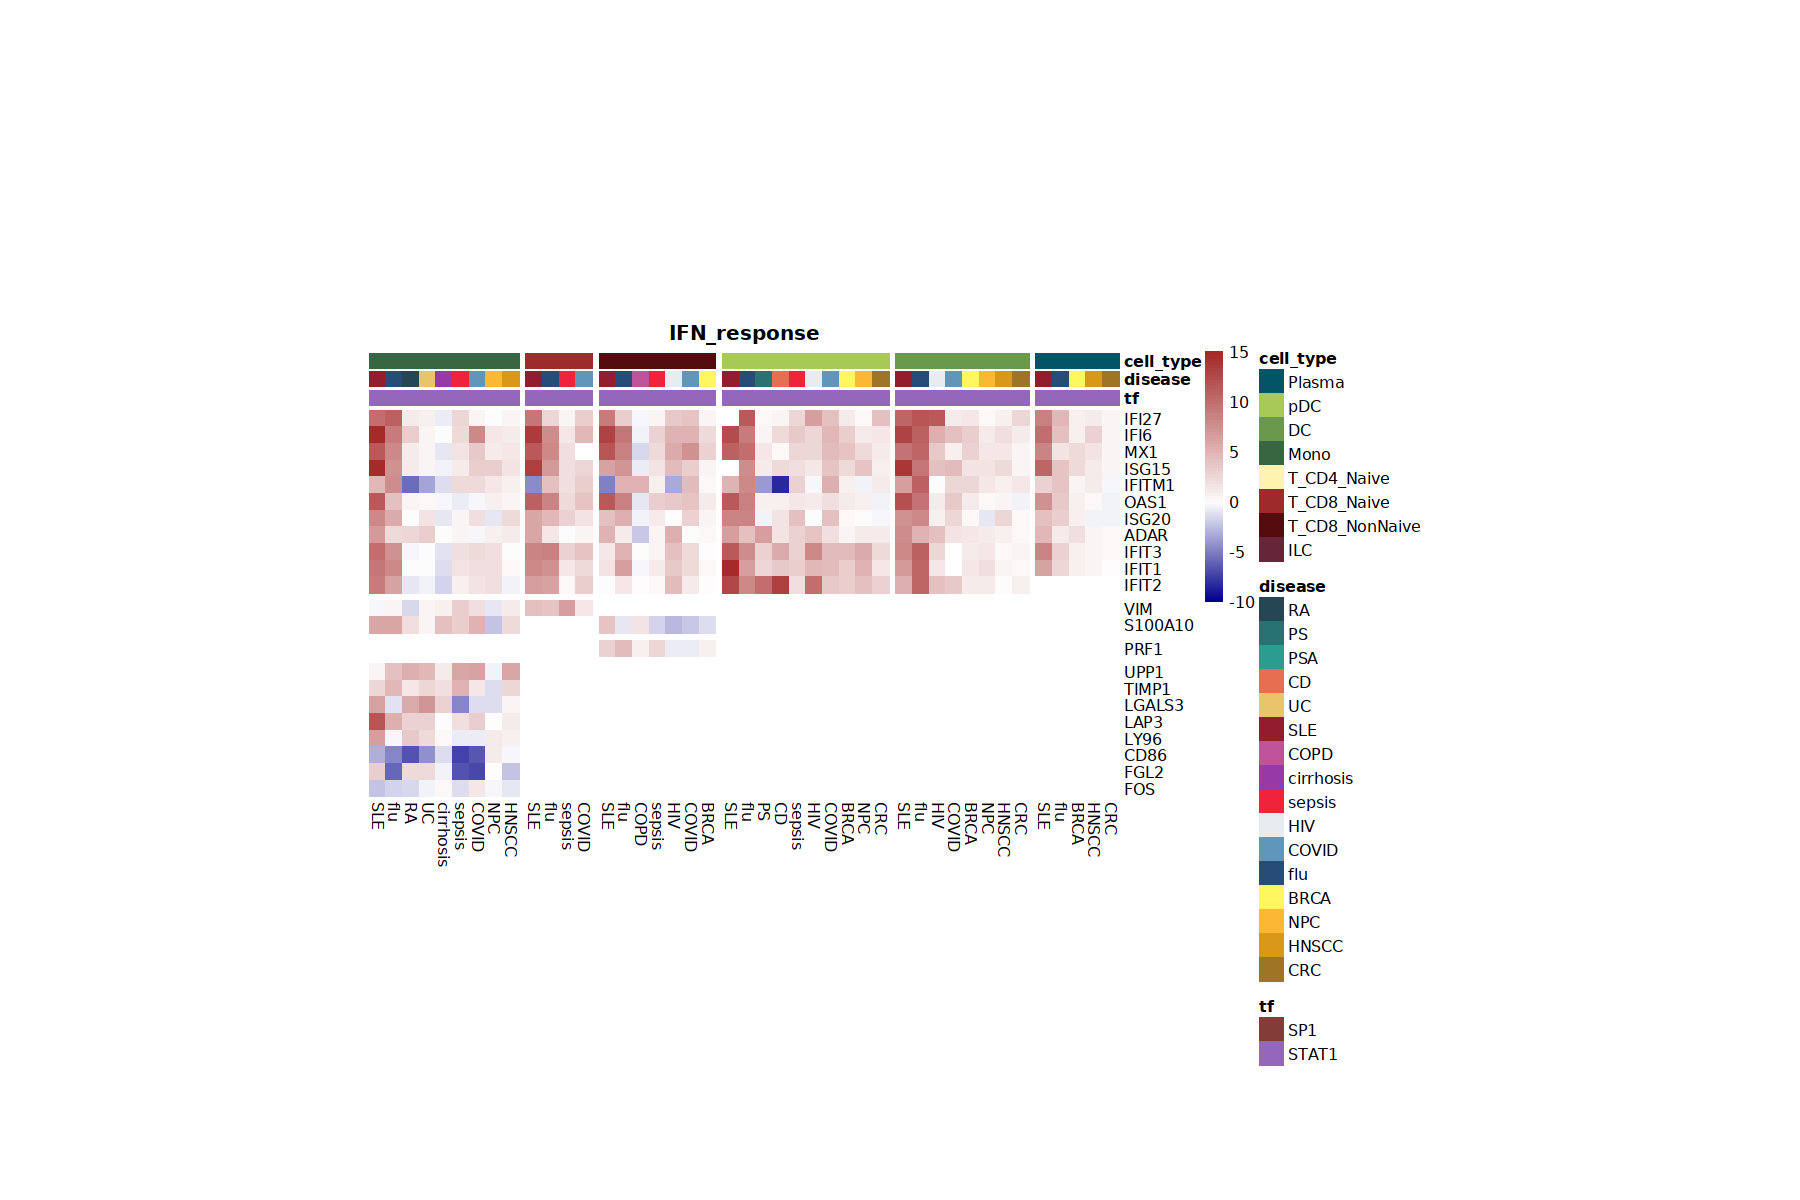

In [63]:
print(stat1_heatmap)

### SP1

In [47]:
row_order <- c('GAPDH', 'ACTB', 'S100A6', 'IFITM3', 'ISG20','FTH1',
'OAS1',   'MX2', 'MT2A',
               

'RAC2',
'CALM1', 'SRSF7','FUS', 

               'ADGRG1', 
               
 'LGALS1',
               
'COX4I1', 'VIM',
   'S100A10',                           

               
'FBP1', 'S100A8', 'TYMP', 'TIMP1', 'LGALS3', 'ITGAX', 'SLC11A1', 'SPI1', 'PSAP', 'STXBP2', 'TKT', 'FGL2', 'LYZ', 'TNFSF13', 'TSPO', 'GSTP1',
               'FOS',"SERPINA1"


               

               

              )

In [48]:
tf_name <- "SP1"
tf_df <- tf_list[[tf_name]]

cell_type_order <- c("Mono", "T_CD8_NonNaive",  "T_CD4_Naive","ILC")
tf_order <- c("STAT1", "SP1")
disease_order <- c(
    'SLE',"flu",
  'RA', 'PS', 'PSA', 'CD', 'UC',  'MS',
  'asthma', 'COPD', 'cirrhosis', 'sepsis',
  'HIV', 'HBV', 'COVID',
  'BRCA', 'NPC', 'HNSCC', 'CRC'
)

# Convert columns to factors with specified levels
tf_df <- tf_df %>%
  mutate(
    cell_type = factor(cell_type, levels = cell_type_order),
    tf = factor(tf, levels = tf_order),
    disease = factor(disease, levels = disease_order)
  )

# Order the data frame by cell_type, tf, and disease
tf_df <- tf_df %>%
  arrange(tf, cell_type, disease)

tf_xx <-   xx[row_order, rownames(tf_df)]
tf_xx <- tf_xx[rowSums(is.na(tf_xx)) != ncol(tf_xx), ]

figure_path <- paste0(outputpath, "TF_genes_heatmap_", tf_name, lmm,".pdf")
pdf(figure_path, width = 15, height = 12)
sp1_heatmap <- pheatmap::pheatmap(
    tf_xx,
    border_color = NA,
    na_col = "white",
    color = my_color,
    breaks = my_breaks,
    annotation_colors = my_colour_annot,
    cluster_cols = FALSE,
    cluster_rows = FALSE,
    cellheight = 10,
    cellwidth = 10,
    annotation_col = tf_df,
    cex = 1,
    fontsize = 9,
    labels_col = tf_df$disease,
    filename = figure_path,
    main = "IFN_response",
    #gaps_row = c(9,10,12,13,14,32,35),
    gaps_row = c(9,10,13,14, 18),
    #gaps_col = c(5,8, 10)
    gaps_col = c(10,15, 20)
    )
print(sp1_heatmap)
dev.off()

pdf 
  4

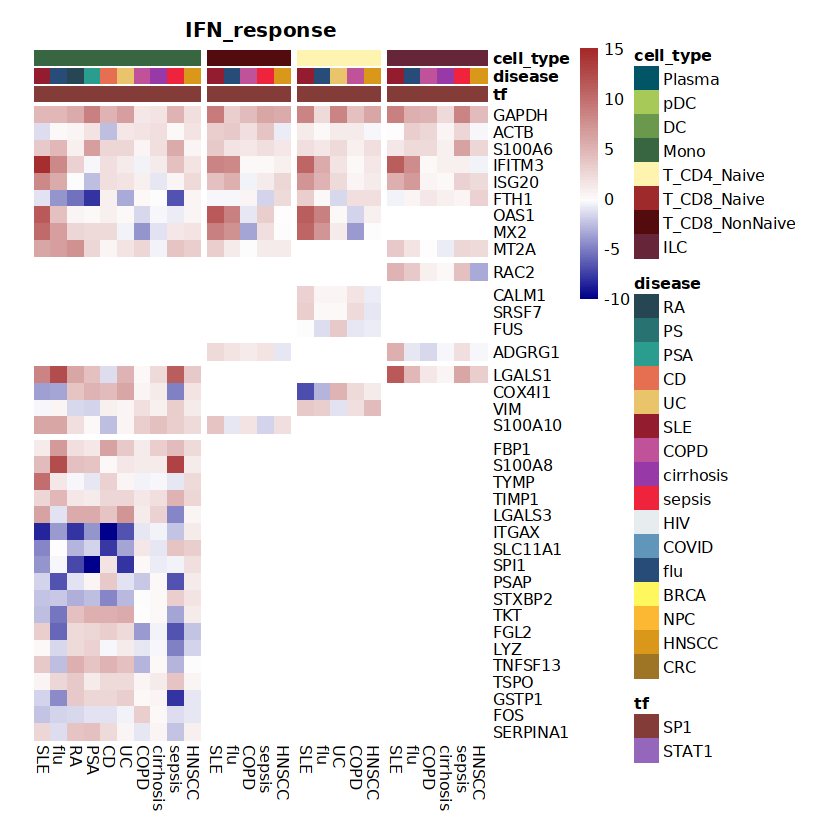

In [50]:
print(sp1_heatmap)